In [6]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O (e.g pd.read_csv)
import matplotlib.pyplot as plt # for plotting graphs and hingi characters
print('Libraries Imported')
import tensorflow as tf
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator


Libraries Imported


In [2]:
# Loading the data set


train = pd.read_csv(r"C:\Users\comp\Downloads\dhabd\train.csv")
print('Shabd Train Dataset loaded')
print('Train shape: ',train.shape)
print(train.head())

Shabd Train Dataset loaded
Train shape:  (243456, 1026)
   Index label  f_1  f_2  f_3  f_4  f_5  f_6  f_7  f_8  ...  f_1015  f_1016  \
0     83     अ  255  255  255  255  255  255  255  255  ...     255     255   
1    620     अ  255  255  255  255  255  255  255  255  ...     255     255   
2    508     अ  255  255  255  255  255  255  255  255  ...     255     255   
3    497     अ  255  255  255  255  255  255  255  255  ...     255     255   
4    679     अ  255  255  255  255  255  255  255  255  ...     255     255   

   f_1017  f_1018  f_1019  f_1020  f_1021  f_1022  f_1023  f_1024  
0     255     255     255     255     255     255     255     255  
1     255     255     255     255     255     255     255     255  
2     255     255     255     255     255     255     255     255  
3     255     255     255     255     255     255     255     255  
4     255     255     255     255     255     255     255     255  

[5 rows x 1026 columns]


In [3]:
print(train.iloc[20345])

Index     107
label      खू
f_1       255
f_2       255
f_3       254
         ... 
f_1020    255
f_1021    255
f_1022    255
f_1023    255
f_1024    255
Name: 20345, Length: 1026, dtype: object


In [4]:
# read test
test = pd.read_csv(r"C:\Users\comp\Downloads\dhabd\test(grayscale).csv")
print('Shabd Test Dataset loaded')
print("Test shape: ",test.shape)
print(test.head())

Shabd Test Dataset loaded
Test shape:  (60672, 1026)
   Index label  f_1  f_2  f_3  f_4  f_5  f_6  f_7  f_8  ...  f_1015  f_1016  \
0     12     अ  255  255  255  255  255  255  255  255  ...     255     255   
1     27     अ  255  255  255  255  255  255  255  255  ...     255     255   
2     30     अ  255  255  255  255  255  255  255  255  ...     255     255   
3     33     अ  255  255  255  255  255  255  255  255  ...     255     255   
4     36     अ  255  255  255  255  255  255  255  255  ...     255     255   

   f_1017  f_1018  f_1019  f_1020  f_1021  f_1022  f_1023  f_1024  
0     255     255     255     255     255     255     255     255  
1     255     255     255     255     255     255     255     255  
2     255     255     255     255     255     255     255     255  
3     255     255     255     255     255     255     255     255  
4     255     255     255     255     255     255     255     255  

[5 rows x 1026 columns]


In [5]:
# put labels into train and test variable
y_train = train['label']
y_test = test['label']
# Drop label column
X_train = train.drop(labels = ['label', 'Index'], axis = 1)
X_test = test.drop(labels = ['label', 'Index'], axis = 1)

print('Seperated Features and labels from train and test sets')

print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)


Seperated Features and labels from train and test sets
X_train shape:  (243456, 1024)
X_test shape:  (60672, 1024)
y_train shape:  (243456,)
y_test shape:  (60672,)


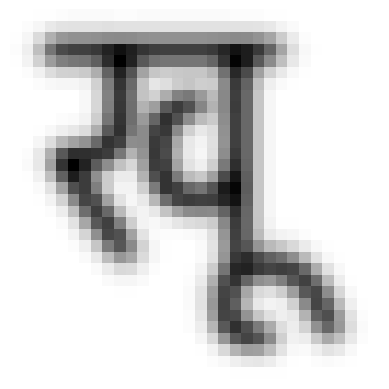

In [6]:
# plotting random sample from X_train
img = X_train.iloc[20345].to_numpy()
img = img.reshape((32,32))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

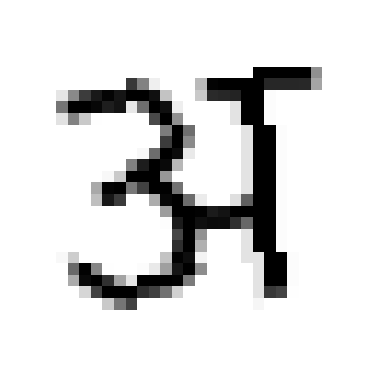

In [7]:
# plotting random sample from X_test

img = X_test.iloc[100].to_numpy()
img = img.reshape((32,32))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
#using label encoder converting non numeric cols to numeric

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

print("Converted Non-Numeric Labels into numeric")

#Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Converted into one-hot-encoding')
print('y_train shape: ' ,y_train.shape)


Converted Non-Numeric Labels into numeric
Converted into one-hot-encoding
y_train shape:  (243456, 384)


In [9]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 2)
print('Splitted the data into train and test')

Splitted the data into train and test


In [10]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

print('Normalized Feature values')

print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('X_val shape: ',X_val.shape)


Normalized Feature values
X_train shape:  (219110, 1024)
X_test shape:  (60672, 1024)
X_val shape:  (24346, 1024)


In [11]:
# Reshape

X_train = X_train.values.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.values.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.values.reshape(X_val.shape[0], 32, 32, 1)

print('Reshaped features')

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X_val shape: ', X_val.shape)


Reshaped features
X_train shape:  (219110, 32, 32, 1)
X_test shape:  (60672, 32, 32, 1)
X_val shape:  (24346, 32, 32, 1)


In [8]:
#build model
model = Sequential()

#Layer1----------------------------------------------------------
model.add(Conv2D(filters = 8,
			kernel_size = (5,5),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Dropout(0.25))


 


#Layers 2-----------------------------------------------------------	
model.add(Conv2D(filters = 8,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(3000,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(1000,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(384,
		activation = "sigmoid",
		kernel_initializer = "uniform"))			
			
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 8)        32        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 8)         5

In [18]:
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
print('Model Compiled')

Model Compiled


In [14]:
epochs = 10 # for better result increase the epochs
batch_size = 200
print('Set Epoch as: ',epochs)
print('Set Batch Size as: ',batch_size)

Set Epoch as:  50
Set Batch Size as:  10


In [15]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range= 5, 
    zoom_range = 0.1, 
    width_shift_range=0.1,
    height_shift_range=0.1,
)

datagen.fit(X_train)
print('Data Augmentation Done')



Data Augmentation Done


In [ ]:
import tensorflow as tf
from keras import callbacks
# Running on GPU if present
with tf.device('/gpu:0'):
    # Fit the model
    history = model.fit_generator(datagen.flow(X_train, y_train),
                    epochs = epochs, validation_data = (X_val, y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,)

print('Fitted the Model with data')

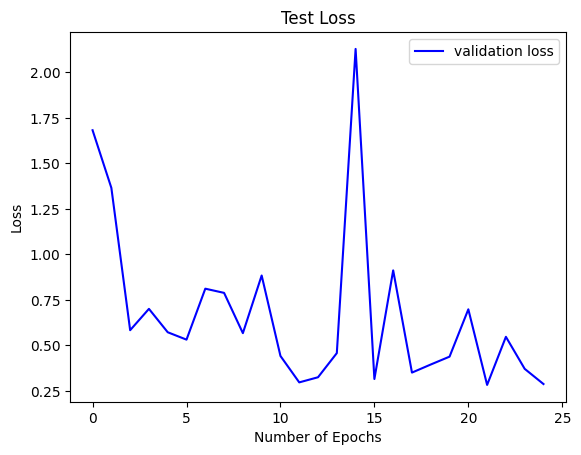

In [21]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

print('Evaluating the Model')

Evaluating the Model


In [23]:
print('Train accuracy : %.3f, Test accuracy : %.3f' % (train_mse[1], test_mse[1]))

Train accuracy : 0.908, Test accuracy : 0.903


In [24]:
model.save("Hindiv3.h5")

In [37]:
#set labels
labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
test_image = cv2.imread(r"C:\Users\comp\Downloads\DevanagariHandwrittenCharacterDataset\DevanagariHandwrittenCharacterDataset\Test\character_3_ga\11933.png")
#preprocessing
image = cv2.resize(test_image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)
print("[INFO] loading network...")
#load the saved weights of the model
model = tf.keras.models.load_model("Hindiv3.h5")
lists = model.predict(image)[0]
#prediction
print("The letter is ",labels2[np.argmax(lists)])
arg=(np.argmax(lists))
print(arg)


[INFO] loading network...
1/1 [==============================] - 1s 971ms/step
The letter is  शी
341
